# Image Creation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras

# Helper libraries
import pandas as pd

print(tf.__version__)
print(tf.keras.__version__)

2.10.0
2.10.0


In [2]:
def var_data(dataset, window_size):
    
    n = dataset.shape[0]
    m = dataset.shape[1]

    window_steps = m - window_size

    var_dat = np.zeros((n,window_steps))

    for j in range(n):
        for i in range(window_steps):
            var_dat[j,i] = dataset[j,i:window_size+i].var()
    
    return var_dat

def auto_data(dataset, window_size, k=1):
    n = dataset.shape[0]
    m = dataset.shape[1]
    
    window_steps = m - (window_size + k)

    auto_dat = np.zeros((n,window_steps))

    for j in range(n):
        a = dataset[j, 0 :  window_size]
        for i in range(window_steps):
            b = dataset[j, i + k : i + k + window_size]
            auto_dat[j,i] = np.corrcoef(a,b)[0,1]
            a = b
    
    return auto_dat

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [3]:
def create_time_series(data, steps_back=5, steps_forward=1, features = 2):
    """Creates time series from set of data.
        Takes in sample of data, creates time series of final (step_forward + step_back) steps.
        
        data := array, has form (# samples, # features, # time steps)
        steps_back, steps_forward := int, amount of steps_back used to guess steps_forward
        features := amount of features present in the data (ex. variance and autocorrelation)
        
        Returns 2 arrays, where 'X' consists of (t-step_back, ..., t-1)
                                'y' consists of (t)
        """
    
    ## Initialise arrays for data
    ##  Has shape (sample, timesteps, features)
    X = np.zeros((data.shape[0],steps_back,features))
    y = np.zeros((data.shape[0],steps_forward,features))
    
    ## Begin loop for each sample
    for i in range(data.shape[0]):
        ## ... and each feature
        for j in range(features):
            X[i,:,j] = data[i,j,-(steps_back+steps_forward):-steps_forward]
            y[i,:,j] = data[i,j,-steps_forward:]
    
    return X,y

In [4]:
def draw_arrow(plt, arr_start, arr_end, width=0.3, length=0.5, color='r'):
    dx = arr_end[0] - arr_start[0]
    dy = arr_end[1] - arr_start[1]
    plt.arrow(arr_start[0], arr_start[1], dx, dy, head_width=width, head_length=length, length_includes_head=True, color=color)

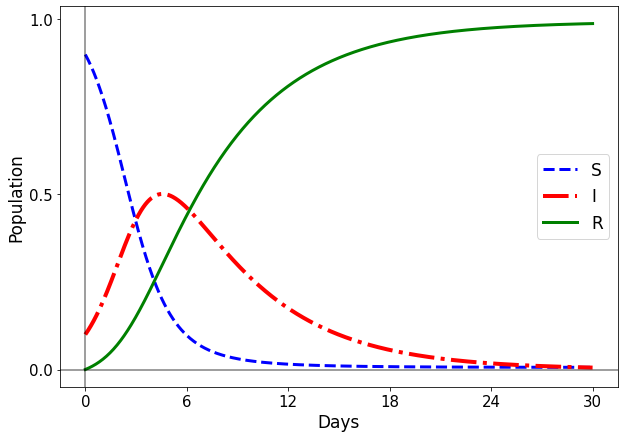

In [5]:
M = 30*24
SIR = np.zeros((3,M))
t = np.linspace(0,30,M)

beta = 1
gamma = 0.2

dt = abs(t[0]-t[1])
dS = lambda S,I: -beta * S * I
dI = lambda S,I: -dS(S,I) - gamma * I
dR = lambda I: gamma * I

Si = 0.9
Ii = 0.1
Ri = 0.0

SIR[:,0] = [Si, Ii, Ri]

N = sum(SIR[:,0])

for i in range(1,M):
    
    S = SIR[0,i-1] + dS(SIR[0,i-1], SIR[1,i-1]) * dt
    I = SIR[1,i-1] + dI(SIR[0,i-1], SIR[1,i-1]) * dt
    R = N - S - I 
    
    SIR[:,i] = [S,I,R]

#SIR *= 10000
plt.figure(1,(10,7))
plt.plot(t,SIR[0], 'b--', label='S', linewidth=3)
plt.plot(t,SIR[1], 'r-.', label='I', linewidth=4)
plt.plot(t,SIR[2], 'g', label='R', linewidth=3)

plt.xlabel('Days', fontsize=17)
plt.ylabel('Population', fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(0, 36, 6), fontsize=15) 
plt.yticks(np.arange(0, 1.5000, .5000), fontsize=15)

plt.legend(loc='best', fontsize=17)

#plt.savefig('SIR.pdf', dpi=300, bbox_inches="tight")

plt.show()

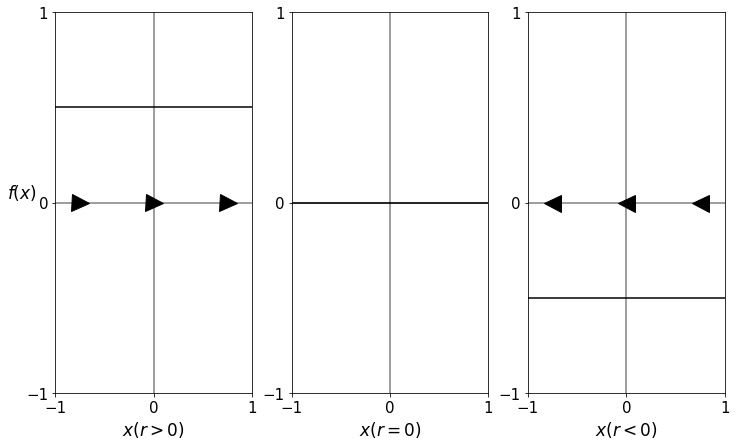

In [6]:
x = np.linspace(-2,2,100)

plt.figure(1,(12,7))

plt.subplot(1,3,1)

plt.axhline(y=0.5, color='k')

plt.xlabel('$x (r>0)$', fontsize=17)
plt.ylabel('$f(x)$', rotation=0, fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-1, 4, 1), fontsize=15)

plt.plot(0,0, 'k>', markersize=17)
plt.plot(-0.75,0, 'k>', markersize=17)
plt.plot(0.75,0, 'k>', markersize=17)

plt.xlim(-1,1)
plt.ylim((-1,1))


plt.subplot(1,3,2)

plt.axhline(y=0, color='k')

plt.xlabel('$x (r=0)$', fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-1, 4, 1), fontsize=15)

plt.xlim(-1,1)
plt.ylim((-1,1))


plt.subplot(1,3,3)

plt.axhline(y=-0.5, color='k')

plt.xlabel('$x (r<0)$', fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-1, 4, 1), fontsize=15)

plt.plot(0,0, 'k<', markersize=17)
plt.plot(-0.75,0, 'k<', markersize=17)
plt.plot(0.75,0, 'k<', markersize=17)

plt.xlim(-1,1)
plt.ylim((-1,1))


#plt.savefig('zero_deg_system_bif.pdf', dpi=300)
plt.show()

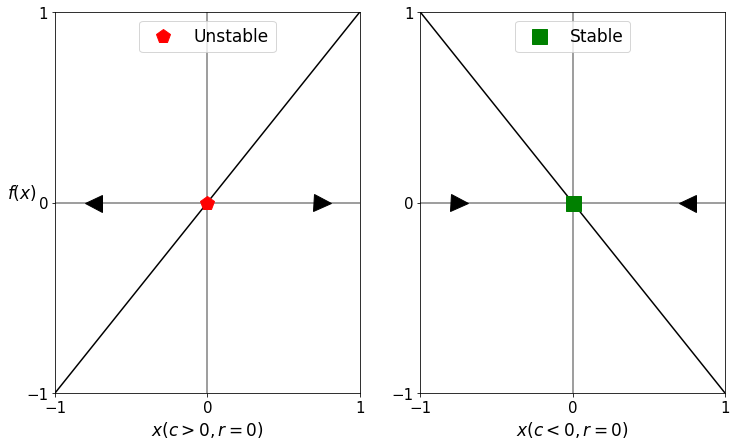

In [7]:
x = np.linspace(-2,2,100)
f = lambda x,r: x + r 
plt.figure(1,(12,7))

plt.subplot(1,2,1)

plt.plot(x,f(x,0), 'k')

plt.xlabel('$x (c>0, r=0)$', fontsize=17)
plt.ylabel('$f(x)$', rotation=0, fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-1, 4, 1), fontsize=15)

plt.plot(0,0, 'rp', markersize=15, label='Unstable')
plt.plot(-0.75,0, 'k<', markersize=17)
plt.plot(0.75,0, 'k>', markersize=17)

plt.xlim(-1,1)
plt.ylim((-1,1))

plt.legend(loc=9, fontsize=17)

plt.subplot(1,2,2)

plt.plot(x,-f(x,0), 'k')
plt.xlabel('$x (c<0, r=0)$', fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-1, 4, 1), fontsize=15)

plt.plot(0,0, 'gs', markersize=15, label='Stable')
plt.plot(-0.75,0, 'k>', markersize=17)
plt.plot(0.75,0, 'k<', markersize=17)
plt.xlim(-1,1)
plt.ylim((-1,1))

plt.legend(loc=9, fontsize=17)

#plt.savefig('one_deg_system.pdf', dpi=300)
plt.show()

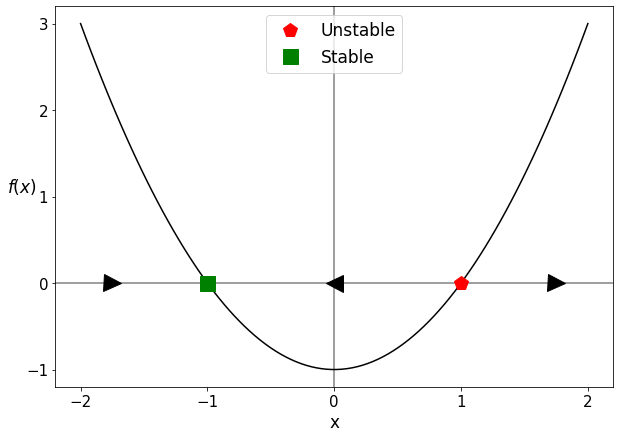

In [8]:
x = np.linspace(-2,2,100)
f = lambda x,r=-1: x**2 + r
plt.figure(1,(10,7))
plt.plot(x,f(x), 'k')

plt.xlabel('x', fontsize=17)
plt.ylabel('$f(x)$', rotation=0, fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-1, 4, 1), fontsize=15)

plt.plot(1,0, 'rp', markersize=15, label='Unstable')
plt.plot(-1,0, 'gs', markersize=15, label='Stable')

plt.plot(0,0, 'k<', markersize=17)
plt.plot(-1.75,0, 'k>', markersize=17)
plt.plot(1.75,0, 'k>', markersize=17)

plt.legend(loc=9, fontsize=17)

#plt.savefig('two_deg_system.pdf', dpi=300)
plt.show()

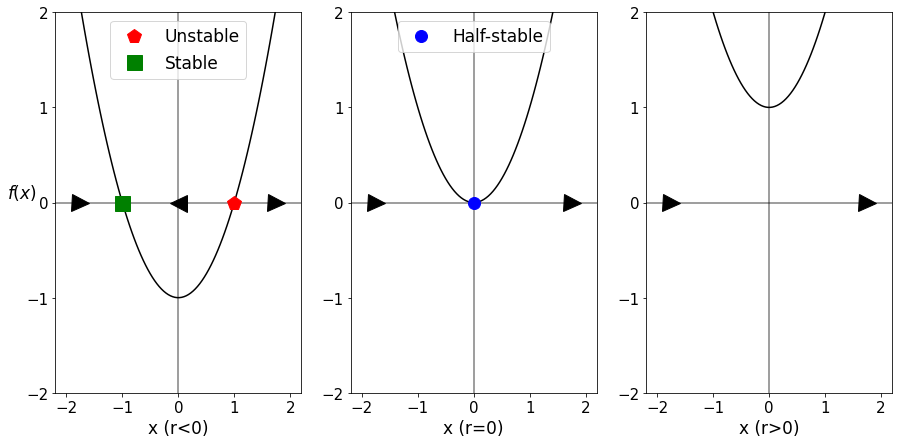

In [9]:
x = np.linspace(-2,2,100)
f = lambda x,r=-1: x**2 + r
plt.figure(1,(15,7))

plt.subplot(1,3,1)
plt.plot(x,f(x), 'k')

plt.xlabel('x (r<0)', fontsize=17)
plt.ylabel('$f(x)$', rotation=0, fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-2, 4, 1), fontsize=15)

plt.plot(1,0, 'rp', markersize=15, label='Unstable')
plt.plot(-1,0, 'gs', markersize=15, label='Stable')

plt.plot(0,0, 'k<', markersize=17)
plt.plot(-1.75,0, 'k>', markersize=17)
plt.plot(1.75,0, 'k>', markersize=17)

plt.ylim((-2,2))

plt.legend(loc=9, fontsize=17)




plt.subplot(1,3,2)
plt.plot(x,f(x,0), 'k')

plt.xlabel('x (r=0)', fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-2, 4, 1), fontsize=15)

plt.plot(0,0, 'bo', markersize=12, label='Half-stable')

plt.plot(-1.75,0, 'k>', markersize=17)
plt.plot(1.75,0, 'k>', markersize=17)

plt.ylim((-2,2))

plt.legend(loc=9, fontsize=17)


plt.subplot(1,3,3)
plt.plot(x,f(x,1), 'k')

plt.xlabel('x (r>0)', fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-2, 4, 1), fontsize=15)


plt.plot(-1.75,0, 'k>', markersize=17)
plt.plot(1.75,0, 'k>', markersize=17)

plt.ylim((-2,2))

#plt.savefig('two_deg_system_bif.pdf', dpi=300)
plt.show()

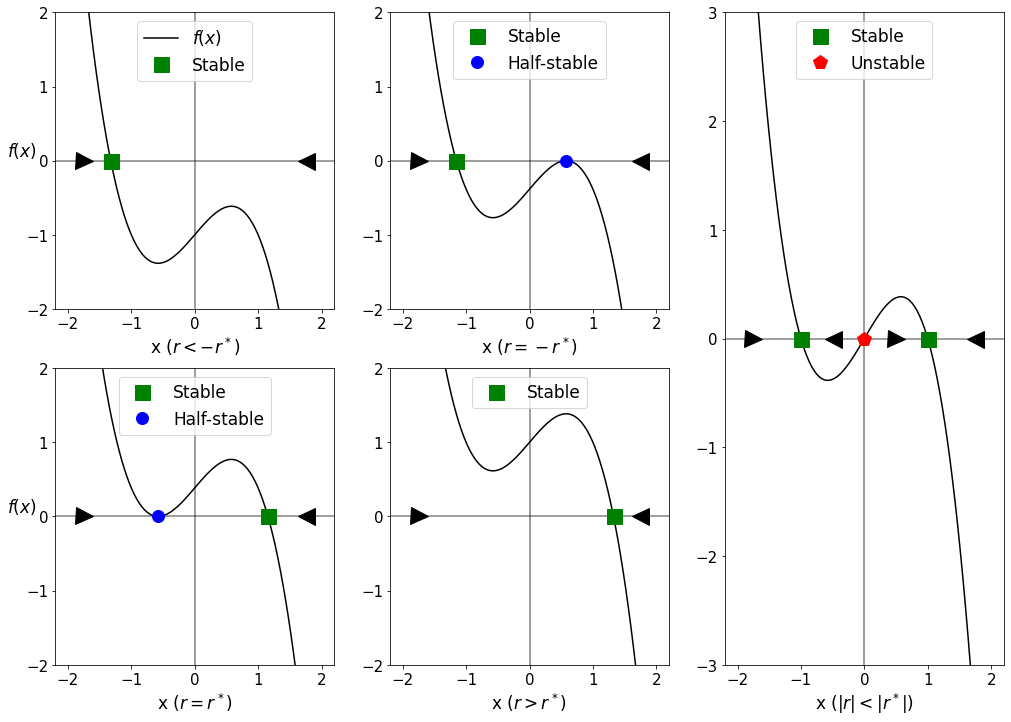

In [10]:
def fp_cubic(func, params, t=0):
    a = params[0]
    b = params[1]
    c = params[2]
    d = params[3]
    
    x_min = -2*b/(3*a) - 1/2 * np.sqrt(4/9 * b**2/a**2 - 4/3 * c/a)
    x_max = -2*b/(3*a) + 1/2 * np.sqrt(4/9 * b**2/a**2 - 4/3 * c/a)
    
    return x_min, x_max

f = lambda x,r=-1: -x**3 + x + r


x = np.linspace(-2,2,100)

roots = np.roots([-1,0,1,-1])
x_min, x_max = fp_cubic(f, [-1,0,1,0])

plt.figure(1,(17,12))

plt.subplot(2,3,1)
plt.plot(x,f(x,-1), 'k', label='$f(x)$')

plt.xlabel('x ($r<-r^*$)', fontsize=17)
plt.ylabel('$f(x)$', rotation=0, fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-2, 4, 1), fontsize=15)

plt.plot(np.real(roots[0]),0, 'gs', markersize=15, label='Stable')

plt.plot(-1.75,0, 'k>', markersize=17)
plt.plot(1.75,0, 'k<', markersize=17)

plt.ylim((-2,2))

plt.legend(loc=9, fontsize=17)


roots = np.roots([-1,0,1,0])

plt.subplot(2,3,(3,6))
plt.plot(x,f(x,0), 'k')

plt.xlabel('x ($|r|<|r^*|$)', fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 5, 1), fontsize=15) 
plt.yticks(np.arange(-4, 5, 1), fontsize=15)

plt.plot(roots[0],0, 'gs', markersize=15, label='Stable')
plt.plot(roots[2],0, 'rp', markersize=15, label='Unstable')
plt.plot(roots[1],0, 'gs', markersize=15)

plt.plot(-1.75,0, 'k>', markersize=17)
plt.plot(-0.5,0, 'k<', markersize=17)
plt.plot(0.5,0, 'k>', markersize=17)
plt.plot(1.75,0, 'k<', markersize=17)

plt.ylim((-3,3))

plt.legend(loc=9, fontsize=17)


roots = np.roots([-1,0,1,f(x_min,0)])

plt.subplot(2,3,2)
plt.plot(x,f(x,f(x_min,0)), 'k')

plt.xlabel('x ($r=-r^*$)', fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 4, 1), fontsize=15) 
plt.yticks(np.arange(-2, 6, 1), fontsize=15)

plt.plot(np.real(roots[0]), 0, 'gs', markersize=15, label='Stable')
plt.plot(np.real(roots[1]), 0, 'bo', markersize=12, label='Half-stable')

plt.plot(-1.75,0, 'k>', markersize=17)
plt.plot(1.75,0, 'k<', markersize=17)

plt.ylim((-2,2))
plt.legend(loc=9, fontsize=17)



roots = np.roots([-1,0,1,f(x_max,0)])

plt.subplot(2,3,4)
plt.plot(x,f(x,f(x_max,0)), 'k')

plt.xlabel('x ($r=r^*$)', fontsize=17)
plt.ylabel('$f(x)$', rotation=0, fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-2, 4, 1), fontsize=15)

plt.plot(np.real(roots[0]), 0, 'gs', markersize=15, label='Stable')
plt.plot(np.real(roots[1]), 0, 'bo', markersize=12, label='Half-stable')

plt.plot(-1.75,0, 'k>', markersize=17)
plt.plot(1.75,0, 'k<', markersize=17)

plt.ylim((-2,2))
plt.legend(loc=9, fontsize=17)


roots = np.roots([-1,0,1,1])
plt.subplot(2,3,5)
plt.plot(x,f(x,1), 'k')

plt.xlabel('x ($r>r^*$)', fontsize=17)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-2, 4, 1), fontsize=15)

plt.plot(np.real(roots[0]), 0, 'gs', markersize=15, label='Stable')

plt.plot(-1.75,0, 'k>', markersize=17)
plt.plot(1.75,0, 'k<', markersize=17)

plt.ylim((-2,2))
plt.legend(loc=9, fontsize=17)


#plt.savefig('three_deg_bif.pdf', dpi=300)

plt.show()

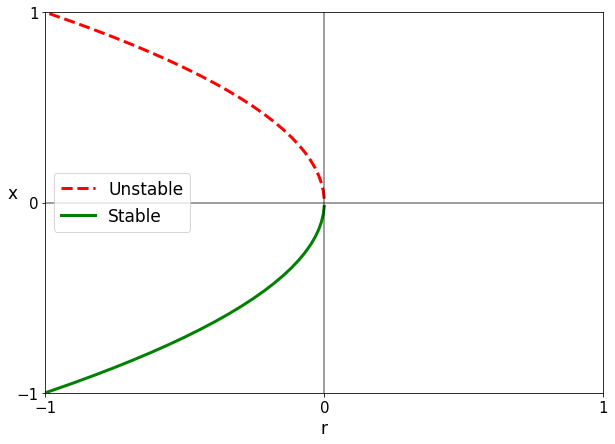

In [11]:
r = lambda x: -x**2

plt.figure(2,(10,7))

plt.plot(r(x[50:]),x[50:], '--r', label='Unstable', linewidth=3)
plt.plot(r(x[:50]),x[:50], '-g', label='Stable', linewidth=3)

plt.xlabel('r', fontsize=17)
plt.ylabel('x', rotation=0, fontsize=17)

plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-1, 4, 1), fontsize=15)
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.legend(loc=6, fontsize=17)

#plt.savefig('two_deg_bif_diag.pdf', dpi=300)

plt.show()

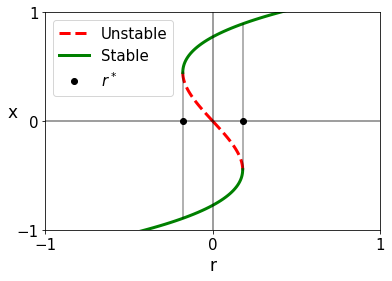

In [12]:
h = lambda x,r=0: x**3 - r*x

r = 0.6

h_c = 2/3 * r * np.sqrt(r/3)
x_m = np.sqrt(r/3)

x_mid = np.linspace(0, x_m, 100)
x_upp = np.linspace(x_m, 2, 100)

# plt.figure(1,(15,7))

# plt.subplot(1,2,1)

#plt.xlabel('r', fontsize=17)
plt.ylabel('x', rotation=0, fontsize=17)

# plt.plot(h(x,-0.1),x, '-g', label='Stable' , linewidth=3)


# plt.axvline(alpha=0.5, color='k')
# plt.axhline(alpha=0.5, color='k')
# plt.xticks(np.arange(-1, 2, 1), fontsize=15) 
# plt.yticks(np.arange(-1, 2, 1), fontsize=15)
# plt.xlim((-1,1))
# plt.ylim((-1,1))
# plt.legend(fontsize=17)



# plt.subplot(1,2,2)
plt.xlabel('r', fontsize=17)

plt.plot(h(x_mid,r),x_mid, '--r' , linewidth=3)
plt.plot(h(-x_mid,r),-x_mid, '--r', label='Unstable' , linewidth=3)
plt.plot(h(x_upp,r),x_upp, '-g' , linewidth=3)
plt.plot(h(-x_upp,r),-x_upp, '-g', label='Stable' , linewidth=3)

plt.plot(h_c,0, 'ko')
plt.plot(-h_c,0, 'ko', label='$r^*$')
plt.axvline(-h_c, 0.053, 0.5+0.5*x_m, color='k', alpha=0.4)
plt.axvline(h_c, 0.5-0.5*x_m, 0.947, color='k', alpha=0.4)

plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-1, 2, 1), fontsize=15) 
plt.yticks(np.arange(-1, 2, 1), fontsize=15)
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.legend(fontsize=15)


#plt.savefig('three_deg_fold_p2.pdf', dpi=300)

plt.show()

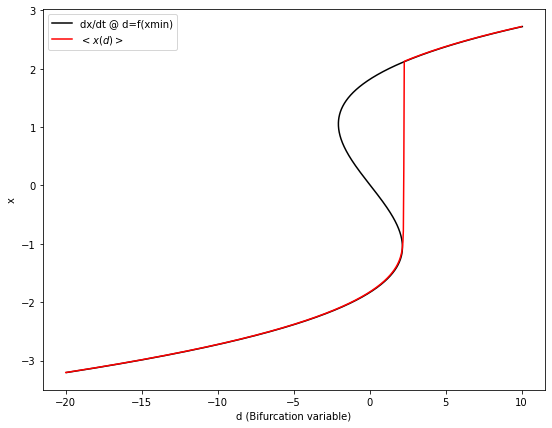

In [13]:
def EulerM(func, X0, tstart=0, tend=1, steps=10, params=None):
    
    t = np.linspace(tstart,tend,steps)
    dt = abs(t[0]-t[1])
    sol = np.zeros([steps])
    sol[0] = X0
    
    for i in range(1, steps):
        sol[i] = sol[i-1] + func(sol[i-1], t=t[i], params=params) * dt
    
    return sol

def EuMa(func, X0, tstart=0, tend=1, steps=10, sigma = 3, params=None):
    
    t = np.linspace(tstart,tend,steps)
    
    dt = abs(t[0]-t[1])
    sol = np.zeros([steps])
    sol[0] = X0
    
    for i in range(1, steps):
        sol[i] = sol[i-1] + func(sol[i-1], t=t[i], params=params) * dt + sigma * np.random.normal(scale=0.005) #triangular(0.0075,0.01,0.0125)
    
    return sol

f = lambda x,t,params: params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3]


X0 = -7

M = 1000
N = 100
sample = 5

params = np.array([-0.9,0,3,0])
d = np.linspace(-20,10,M)

x_min, x_max = fp_cubic(f,params)

data = np.zeros((M))

for i in range(M):
    params[-1] = d[i]
    sol = EuMa(f, X0=X0, steps = N, params=params, sigma=0)

    data[i] = np.mean(sol[-sample:])

    X0 = data[i]

x = np.linspace(data[0],data[-1],M)

plt.figure(figsize=(9,7))

params_init = params
params_init[-1] = 0
params_bifur = params_init
params_bifur[-1] = x_min
bifur_point = f(x_min,0,params)



plt.plot(-1- f(x,t=0,params=params_bifur), x, 'k', label='dx/dt @ d=f(xmin)')

plt.plot(d ,data, 'r', label="$<x(d)>$")
plt.xlabel('d (Bifurcation variable)')
plt.ylabel('x')
plt.legend()
plt.show()

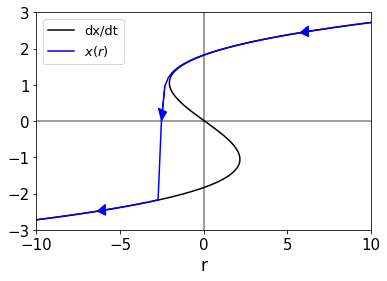

In [14]:
X0 = -7

M = 100
N = 100
sample = 1

params = np.array([-0.9,0,3,0])
d = np.linspace(-10,10,M)

x_min, x_max = fp_cubic(f,params)

data = np.zeros((M))

for i in range(M):
    params[-1] = d[i]
    sol = EuMa(f, X0=X0, steps = N, params=params, sigma=0)


    data[i] = np.mean(sol[-sample:])

    X0 = data[i]

r = np.linspace(10,-10,M)

data1 = np.zeros((M))

for i in range(M):
    params[-1] = r[i]
    sol = EuMa(f, X0=X0, steps = N, params=params, sigma=0)


    data1[i] = np.mean(sol[-sample:])

    X0 = data1[i]


x = np.linspace(data[0],data[-1],M)


params_init = params
params_init[-1] = 0
params_bifur = params_init
params_bifur[-1] = x_min
bifur_point = f(x_min,0,params)

#plt.figure(1,(15,7))
#plt.subplot(1,2,1)

# draw_arrow(plt, [d[20],data[20]], [d[21],data[21]])
# draw_arrow(plt, [d[61],data[61]], [d[62],data[62]], width=0.5, length=0.3)
# draw_arrow(plt, [d[70],data[70]], [d[71],data[71]])
# plt.plot(-1- f(x,t=0,params=params_bifur), x, 'k', label='dx/dt')
# plt.plot(d ,data, 'r', label="$x(r)$")

# #plt.plot(d[20],data[20], 'k>', markersize=17)

# plt.xlabel('r', fontsize=17)
# plt.ylabel('x', rotation=0, fontsize=17)


# plt.axvline(alpha=0.5, color='k')
# plt.axhline(alpha=0.5, color='k')
# plt.xticks(np.arange(-10, 11, 5), fontsize=15) 
# plt.yticks(np.arange(-3, 4, 1), fontsize=15)
# plt.xlim((-10,10))
# plt.ylim((-3,3))
# plt.legend(loc='best', fontsize=13)



# plt.subplot(1,2,2)
plt.xlabel('r', fontsize=17)

draw_arrow(plt, [r[20],data1[20]], [r[21],data1[21]], color='b')
draw_arrow(plt, [r[61],data1[61]], [r[62],data1[62]], width=0.5, length=0.3, color='b')
draw_arrow(plt, [r[80],data1[80]], [r[81],data1[81]], color='b')

plt.plot(-1- f(x,t=0,params=params_bifur), x, 'k', label='dx/dt')
plt.plot(r ,data1, 'b', label="$x(r)$")

plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-10, 11, 5), fontsize=15) 
plt.yticks(np.arange(-3, 4, 1), fontsize=15)
plt.xlim((-10,10))
plt.ylim((-3,3))
plt.legend(loc=2, fontsize=13)


#plt.savefig('three_deg_tipping_p2.pdf', dpi=300)

plt.show()

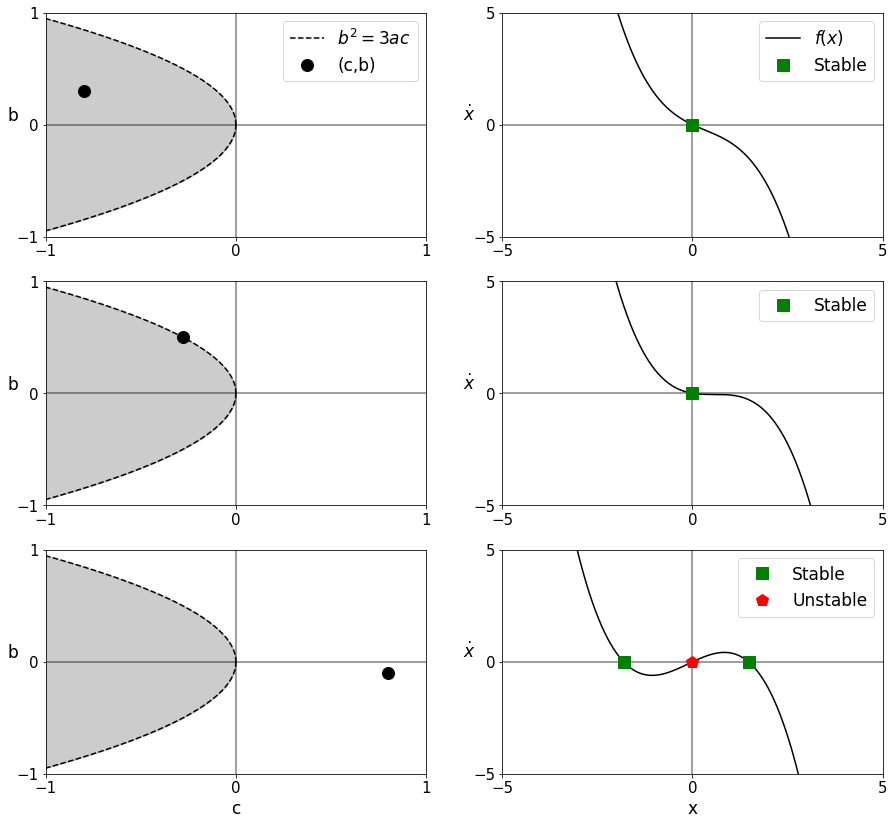

In [15]:
b_squared = lambda c, a=-0.3: np.sqrt(3*a*c)
f = lambda x,t,params: params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3]

c = np.linspace(-2,0,1000)
x = np.linspace(-5,5,1000)
arr = b_squared(c)



plt.figure(1,(15,14))

plt.subplot(3,2,1)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.ylabel('b', rotation=0, fontsize=17)

plt.fill_between(c,-arr,arr, alpha=.2, color='k')
plt.plot(c,arr, 'k--', label="$b^2 = 3ac$")
plt.plot(c,-arr, 'k--')

plt.plot(-0.8,0.3, 'ko', markersize=12, label='(c,b)')

plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-1, 4, 1), fontsize=15)
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.legend(loc=1, fontsize=17)

plt.subplot(3,2,2)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
params = [-0.3, 0.3, -0.8, 0]
plt.ylabel('$\dot{x}$', rotation=0, fontsize=17)

plt.plot(x,f(x,0,params), 'k', label="$f(x)$")

plt.plot(0,0, 'gs', markersize=12, label='Stable')

plt.xticks(np.arange(-5, 6, 5), fontsize=15) 
plt.yticks(np.arange(-5, 6, 5), fontsize=15)
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.legend(loc=1, fontsize=17)



plt.subplot(3,2,3)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.ylabel('b', rotation=0, fontsize=17)

plt.fill_between(c,-arr,arr, alpha=.2, color='k')
plt.plot(c,arr, 'k--')
plt.plot(c,-arr, 'k--')

plt.plot( 0.5**2 / (3*-0.3), 0.5, 'ko', markersize=12)

plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-1, 4, 1), fontsize=15)
plt.xlim((-1,1))
plt.ylim((-1,1))

plt.subplot(3,2,4)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
params = [-0.3, 0.5, 0.5**2 / (3*-0.3), 0]
plt.ylabel('$\dot{x}$', rotation=0, fontsize=17)

plt.plot(x,f(x,0,params), 'k')

plt.plot(0,0, 'gs', markersize=12, label='Stable')

plt.xticks(np.arange(-5, 6, 5), fontsize=15) 
plt.yticks(np.arange(-5, 6, 5), fontsize=15)
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.legend(loc=1, fontsize=17)




plt.subplot(3,2,5)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xlabel('c', fontsize=17)
plt.ylabel('b', rotation=0, fontsize=17)

plt.fill_between(c,-arr,arr, alpha=.2, color='k')
plt.plot(c,arr, 'k--')
plt.plot(c,-arr, 'k--')

plt.plot(0.8, -0.1, 'ko', markersize=12)

plt.xticks(np.arange(-2, 3, 1), fontsize=15) 
plt.yticks(np.arange(-1, 4, 1), fontsize=15)
plt.xlim((-1,1))
plt.ylim((-1,1))


plt.subplot(3,2,6)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
params = [-0.3, -0.1, 0.8, 0]
roots = np.roots(params)
plt.xlabel('x', fontsize=17)
plt.ylabel('$\dot{x}$', rotation=0, fontsize=17)

plt.plot(x,f(x,0,params), 'k')

plt.plot(roots[0],0, 'gs', markersize=12, label='Stable')
plt.plot(0,0, 'rp', markersize=12, label='Unstable')
plt.plot(roots[1],0, 'gs', markersize=12)

plt.xticks(np.arange(-5, 6, 5), fontsize=15) 
plt.yticks(np.arange(-5, 6, 5), fontsize=15)
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.legend(loc=1, fontsize=17)







#plt.savefig('bc_param_space.pdf')

plt.show()

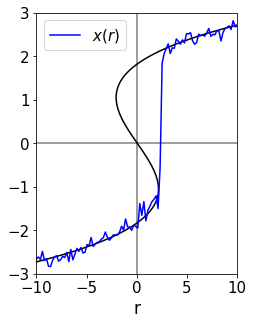

In [16]:
X0_1 = X0_2 = -7

M = 100
N = 100
sample = 1

params = np.array([-0.9,0,3,0])
r = np.linspace(-10,10,M)
x_min, x_max = fp_cubic(f,params)

data1 = np.zeros((2,M))

for i in range(M):
    params[-1] = d[i]
    sol1 = EuMa(f, X0=X0_1, steps = N, params=params, sigma=0)
    
    sol2 = EuMa(f, X0=X0_2, steps = N, params=params, sigma=10)


    data1[0,i] = np.mean(sol1[-sample:])
    data1[1,i] = np.mean(sol2[-sample:])
    
    X0_1 = data1[0,i]
    X0_2 = data1[1,i]


x = np.linspace(data[0],data[-1],M)


params_init = params
params_init[-1] = 0
params_bifur = params_init
params_bifur[-1] = x_min
bifur_point = f(x_min,0,params)

plt.figure(figsize=(3.6,4.8))

# plt.subplot(1,3,1)

# plt.plot(-1- f(x,t=0,params=params_bifur), x, 'k', label='dx/dt')
# plt.plot(r, data1[0], 'r--', label="$x(r)$")

# plt.xlabel('r', fontsize=17)
# plt.ylabel('x', rotation=0, fontsize=17)


# plt.axvline(alpha=0.5, color='k')
# plt.axhline(alpha=0.5, color='k')
# plt.xticks(np.arange(-10, 11, 5), fontsize=15) 
# plt.yticks(np.arange(-3, 4, 1), fontsize=15)
# plt.xlim((-10,10))
# plt.ylim((-3,3))
# plt.legend(loc='best', fontsize=13)



# plt.subplot(1,3,2)
plt.xlabel('r', fontsize=17)

plt.plot(-1- f(x,t=0,params=params_bifur), x, 'k')
plt.plot(r ,data1[1], 'b', label="$x(r)$")

plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(-10, 11, 5), fontsize=15) 
plt.yticks(np.arange(-3, 4, 1), fontsize=15)
plt.xlim((-10,10))
plt.ylim((-3,3))
plt.legend(loc='best', fontsize=15)



# plt.subplot(1,3,3)
# plt.xlabel('r', fontsize=17)

# plt.plot(-1- f(x,t=0,params=params_bifur), x, 'k')
# plt.plot(r, data1[0], 'r--')
# plt.plot(r ,data1[1], 'b')


# plt.axvline(alpha=0.5, color='k')
# plt.axhline(alpha=0.5, color='k')
# plt.xticks(np.arange(-10, 11, 5), fontsize=15) 
# plt.yticks(np.arange(-3, 4, 1), fontsize=15)
# plt.xlim((-10,10))
# plt.ylim((-3,3))


#plt.savefig('three_deg_n-tipping_p2.pdf', dpi=300)

plt.show()

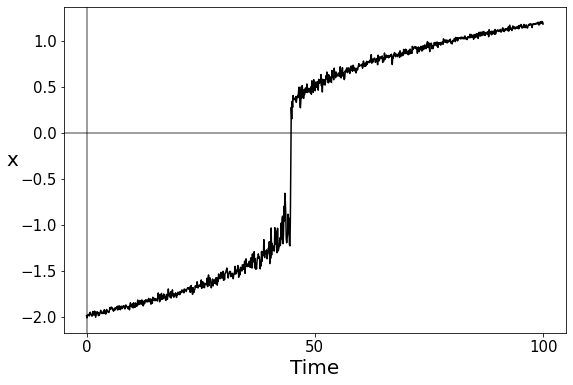

In [17]:
dataset = np.genfromtxt('Datasets/dataset.csv', delimiter=',')

k = 110
l = 180

t = np.linspace(0,100,1000)

plt.figure(figsize=(9,6))

plt.plot(t, dataset[l,1:], label='$x(t)$', color='k')

plt.ylabel('x ', rotation=0, fontsize=20)
plt.xlabel('Time', fontsize=20)

plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(0, 150, 50), fontsize=15) 
plt.yticks(fontsize=15)

#plt.savefig('ode_soln_notip.pdf', dpi=300)

plt.show()

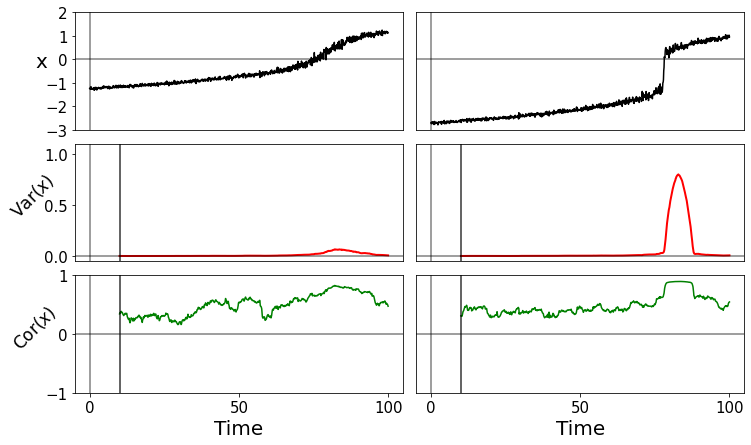

In [18]:
dataset = np.genfromtxt('Datasets/shuffle_dataset.csv', delimiter=',')
var_dat = np.genfromtxt('Datasets/var_dat.csv', delimiter=',')
auto_dat = np.genfromtxt('Datasets/auto_dat.csv', delimiter=',')

k = 42
l = 0

#d = np.linspace(-7,10,1000)
t = np.linspace(0,100,1000)
t_alt = t[100:]



plt.figure(figsize=(12,7))

plt.subplot(3,2,1)
plt.plot(t, dataset[l,1:], color='k')
plt.ylabel('x', rotation=0, fontsize=20)

plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k') 
plt.xticks([]) 
plt.yticks(np.arange(-3, 3, 1), fontsize=15)
plt.ylim(-3,2)



plt.subplot(3,2,2)
plt.plot(t, dataset[k,1:], label='$x(r)$', color='k')


plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k') 
plt.xticks([])
# plt.yticks(np.arange(-3, 3, 1), fontsize=15)
plt.yticks([])
plt.ylim(-3,2)


#plt.legend(loc='best', fontsize=15)


plt.subplot(3,2,3)
plt.plot(t_alt, var_dat[l,], 'r', linewidth=2)
plt.ylabel('Var($x$)', rotation=45, fontsize=17)
plt.axvline(x=10, alpha=0.8, color='k')


plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks([]) 
plt.yticks(np.arange(0, 2, 0.5), fontsize=15)
plt.ylim(-0.05,1.1)



plt.subplot(3,2,4)
plt.plot(t_alt, var_dat[k,], 'r', label='Var($x$)', linewidth=2)
plt.axvline(x=10, alpha=0.8, color='k')
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k') 
plt.xticks([]) 
# plt.yticks(np.arange(0, 2, 0.5), fontsize=15)
plt.yticks([])
plt.ylim(-0.05,1.1)

#plt.legend(loc='best', fontsize=15)



plt.subplot(3,2,5)
plt.plot(t_alt, auto_dat[l,], 'g')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Cor($x$)', rotation=45, fontsize=17)
plt.axvline(x=10, alpha=0.8, color='k')

plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(0, 150, 50), fontsize=15) 
plt.yticks(np.arange(-1, 2, 1), fontsize=15)
plt.ylim(-1,1)






plt.subplot(3,2,6)
plt.plot(t_alt, auto_dat[k,], 'g', label='Cor($x$)')
plt.xlabel('Time', fontsize=20)
plt.axvline(x=10, alpha=0.8, color='k')

plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(0, 150, 50), fontsize=15) 
# plt.yticks(np.arange(-1, 2, 1), fontsize=15)
plt.yticks([])
plt.ylim(-1.1,1.1)

# plt.legend(loc='best', fontsize=15)



plt.subplots_adjust(wspace=0.04, hspace=0.12)

#plt.savefig('data_break_down.pdf', dpi=300)

plt.show()

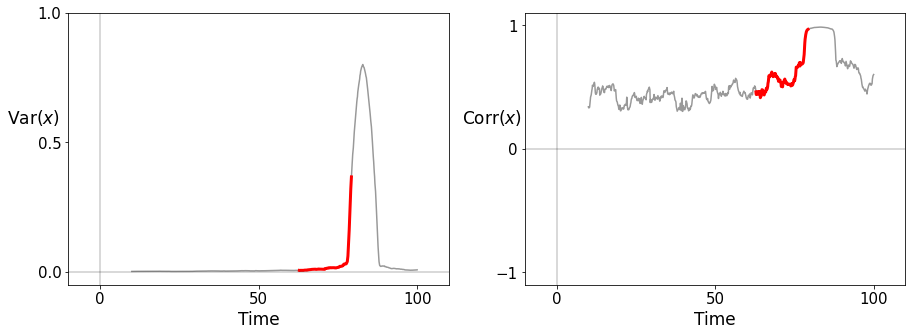

In [19]:
dataset = np.genfromtxt('Datasets/shuffle_dataset.csv', delimiter=',')
var_dat = np.genfromtxt('Datasets/var_dat.csv', delimiter=',')
auto_dat = np.genfromtxt('Datasets/auto_dat.csv', delimiter=',')

labels = dataset[:,0]

t = np.linspace(0,100,1000)
t_alt = t[100:]

tol = 200
tol1 = 35
trim_start = 0

temp1 = []
temp2 = []
temp3 = []

i = 42

end = np.argmax(var_dat[i, trim_start:])
start = end-tol

if start > 0:
    
    trimmed_var = var_dat[i,start:end-tol1]
    trimmed_auto = auto_dat[i,start:end-tol1]
    
    label = labels[i]


plt.figure(figsize=(15,5))


plt.subplot(1,2,1)

plt.plot(t_alt,var_dat[i], 'k', alpha=0.4)

if label == 1:
    plt.plot(t_alt[start:end-tol1], trimmed_var, 'r', linewidth=3)
else:
    plt.plot(t_alt[start:end-tol1], trimmed_var, 'b', linewidth=3)

plt.ylabel('Var($x$)\n', rotation=0, fontsize=17)
plt.xlabel('Time', fontsize=17)
plt.axvline(alpha=0.2, color='k')
plt.axhline(alpha=0.2, color='k')
plt.xticks(np.arange(0, 150, 50), fontsize=15) 
plt.yticks(np.arange(0, 1.5, 0.5), fontsize=15)
plt.xlim(-10,110)
plt.ylim(-0.05,1)



plt.subplot(1,2,2)

plt.plot(t_alt,auto_dat[i], 'k', alpha=0.4)

if label == 1:
    plt.plot(t_alt[start:end-tol1], trimmed_auto, 'r', linewidth=3)
else:
    plt.plot(t_alt[start:end-tol1], trimmed_auto, 'b', linewidth=3)

plt.ylabel('Corr($x$)\n', rotation=0, fontsize=17)
plt.xlabel('Time', fontsize=17)
plt.axvline(alpha=0.2, color='k')
plt.axhline(alpha=0.2, color='k')
plt.xticks(np.arange(0, 150, 50), fontsize=15) 
plt.yticks(np.arange(-1, 2, 1), fontsize=15)
plt.xlim(-10,110)
plt.ylim(-1.1,1.1)

#plt.savefig('trimmed_data.pdf', bbox_inches='tight', dpi=300)

plt.show()

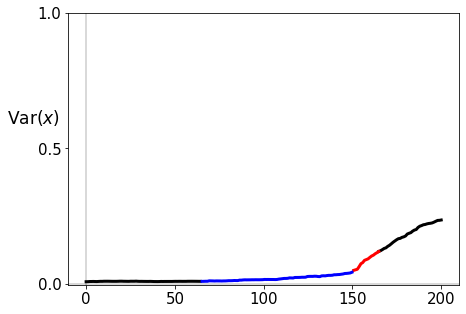

In [20]:
dataset = np.genfromtxt('Datasets/shuffle_dataset.csv', delimiter=',')
var_dat = np.genfromtxt('Datasets/var_dat.csv', delimiter=',')
auto_dat = np.genfromtxt('Datasets/auto_dat.csv', delimiter=',')

labels = dataset[:,0]

tol = 200
tol1 = 35
trim_start = 0

temp1 = []
temp2 = []
temp3 = []

i = 4

end = np.argmax(var_dat[i, trim_start:])
start = end-tol

t = np.linspace(0,200,end-start)
if start > 0:
    
    trimmed_var = var_dat[i,start:end-tol1]
    trimmed_auto = auto_dat[i,start:end-tol1]
    
    label = labels[i]


plt.figure(figsize=(7,5))

plt.plot(t[:65],var_dat[i,start:start+65], 'k', linewidth=3)

plt.plot(t[-tol1-1:],var_dat[i,end-tol1-1:end], 'k', linewidth=3)

plt.plot(t[-tol1-15:-tol1], trimmed_var[-15:], 'r', linewidth=3)
plt.plot(t[65:-tol1-15], trimmed_var[65:-15], 'b', linewidth=3)

plt.ylabel("Var($x$)\n", rotation=0, fontsize=17)

# plt.axvline(t[-tol1])
# plt.axvline(t[-tol1-15])

plt.axvline(alpha=0.2, color='k')
plt.axhline(alpha=0.2, color='k')
plt.xticks(np.arange(0, 250, 50), fontsize=15) 
plt.yticks(np.arange(0, 1.5, 0.5), fontsize=15)

#plt.savefig('time_series_breakdown.svg')#, dpi=300)

plt.show()


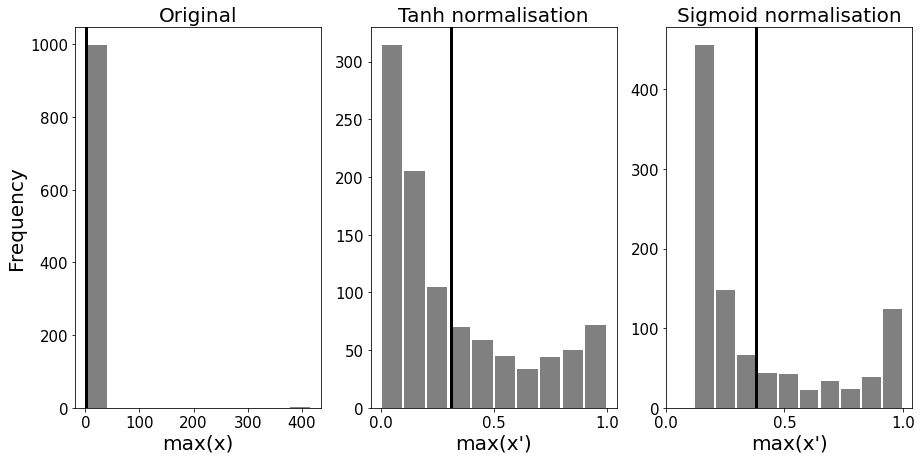

In [21]:
var_dat = np.genfromtxt('Datasets/var_dat.csv', delimiter=',')

tol = 200
tol1 = 25
trim_start = 0

temp1 = []

for i in range(len(var_dat)):
    end = np.argmax(var_dat[i, trim_start:])
    start = end-tol
    
    if start > 0:
        temp1.append(var_dat[i,start:end-tol1])
        
trimmed_var = np.array(temp1)



logistic = lambda x,k=1,x0=0: 1/(1 + np.exp(-k*(x-x0)))

min_max_var = np.zeros(trimmed_var.shape)
for i in range(trimmed_var.shape[0]):
    min_var = trimmed_var[i].min()
    max_var = trimmed_var[i].max()
    min_max_var[i] = (trimmed_var[i] - min_var) / (max_var - min_var)
    
z_score_var = np.zeros(trimmed_var.shape)
for i in range(trimmed_var.shape[0]):
    mean_var = trimmed_var[i].mean()
    std_var = trimmed_var[i].std()
    z_score_var[i] = (trimmed_var[i] - mean_var) / std_var
    
    
    
    
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
plt.hist(np.amax(trimmed_var, axis=1), rwidth=0.9, color='gray')
plt.title('Original', fontsize=20)
plt.axvline(np.amax(trimmed_var, axis=1).mean(), color='k', linewidth=3)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('max(x)', fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)


plt.subplot(1,3,2)
plt.hist(np.amax(np.tanh(trimmed_var), axis=1), rwidth=0.9, color='gray')
plt.title('Tanh normalisation', fontsize=20)
plt.axvline(np.amax(np.tanh(trimmed_var), axis=1).mean(), color='k', linewidth=3)
plt.xlabel("max(x')", fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.5), fontsize=15) 
plt.yticks(fontsize=15)


plt.subplot(1,3,3)
plt.hist(np.amax(logistic(trimmed_var, k=4, x0=0.5), axis=1), rwidth=0.9, color='gray')
plt.title('Sigmoid normalisation', fontsize=20)
plt.axvline(np.amax(logistic(trimmed_var, k=4, x0=0.5), axis=1).mean(), color='k', linewidth=3)
plt.xlabel("max(x')", fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.5), fontsize=15) 
plt.yticks(fontsize=15)

#plt.savefig('variance_distribution_1.pdf', dpi=300)

plt.show()

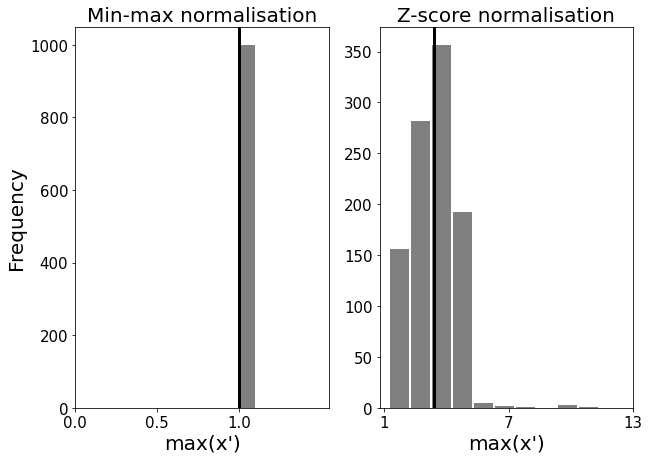

In [22]:
var_dat = np.genfromtxt('Datasets/var_dat.csv', delimiter=',')

tol = 200
tol1 = 25
trim_start = 0

temp1 = []

for i in range(len(var_dat)):
    end = np.argmax(var_dat[i, trim_start:])
    start = end-tol
    
    if start > 0:
        temp1.append(var_dat[i,start:end-tol1])
        
trimmed_var = np.array(temp1)

min_max_var = np.zeros(trimmed_var.shape)
for i in range(trimmed_var.shape[0]):
    min_var = trimmed_var[i].min()
    max_var = trimmed_var[i].max()
    min_max_var[i] = (trimmed_var[i] - min_var) / (max_var - min_var)
    
z_score_var = np.zeros(trimmed_var.shape)
for i in range(trimmed_var.shape[0]):
    mean_var = trimmed_var[i].mean()
    std_var = trimmed_var[i].std()
    z_score_var[i] = (trimmed_var[i] - mean_var) / std_var
    
    

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.hist(np.amax(min_max_var, axis=1), rwidth=0.9, color='gray')
plt.title('Min-max normalisation', fontsize=20)
plt.axvline(np.amax(min_max_var, axis=1).mean(), color='k', linewidth=3)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel("max(x')", fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.5), fontsize=15) 
plt.yticks(fontsize=15)


plt.subplot(1,2,2)
plt.hist(np.amax(z_score_var, axis=1), rwidth=0.9, color='gray')
plt.title('Z-score normalisation', fontsize=20)
plt.axvline(np.amax(z_score_var, axis=1).mean(), color='k', linewidth=3)
plt.xlabel("max(x')", fontsize=20)
plt.xticks(np.arange(1, 14, 6), fontsize=15) 
plt.yticks(fontsize=15)

#plt.savefig('variance_distribution_2.pdf', dpi=300)

plt.show()

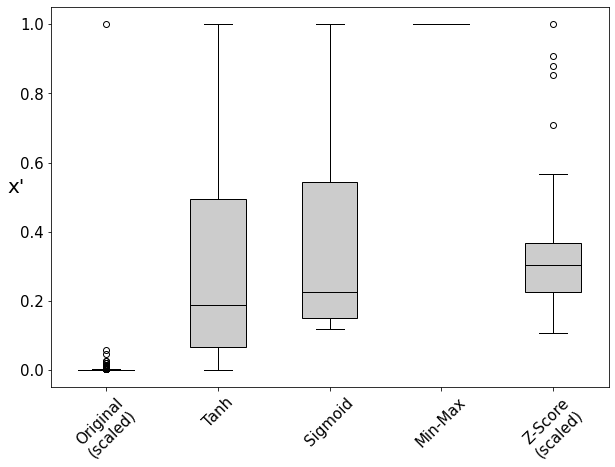

In [23]:
var_dat = np.genfromtxt('Datasets/var_dat.csv', delimiter=',')

tol = 200
tol1 = 25
trim_start = 0

temp1 = []

for i in range(len(var_dat)):
    end = np.argmax(var_dat[i, trim_start:])
    start = end-tol
    
    if start > 0:
        temp1.append(var_dat[i,start:end-tol1])
        
trimmed_var = np.array(temp1)


logistic = lambda x,k=1,x0=0: 1/(1 + np.exp(-k*(x-x0)))

min_max_var = np.zeros(trimmed_var.shape)
for i in range(trimmed_var.shape[0]):
    min_var = trimmed_var[i].min()
    max_var = trimmed_var[i].max()
    min_max_var[i] = (trimmed_var[i] - min_var) / (max_var - min_var)
    
z_score_var = np.zeros(trimmed_var.shape)
for i in range(trimmed_var.shape[0]):
    mean_var = trimmed_var[i].mean()
    std_var = trimmed_var[i].std()
    z_score_var[i] = (trimmed_var[i] - mean_var) / std_var
    
    
    
labels = ['Original\n(scaled)', 'Tanh', 'Sigmoid', 'Min-Max', 'Z-Score\n(scaled)']

plt.figure(figsize=(10,7))
plt.boxplot([np.amax(trimmed_var, axis=1)/np.max(np.amax(trimmed_var, axis=0)),
             np.amax(np.tanh(trimmed_var), axis=1),
             np.amax(logistic(trimmed_var, k=4, x0=0.5), axis=1),
             np.amax(min_max_var, axis=1),
             np.amax(z_score_var, axis=1)/np.max(np.amax(z_score_var, axis=1))], patch_artist=True, boxprops=dict(facecolor='0.8', color='k'), medianprops=dict(color='k'))
plt.ylabel("x'", rotation=0, fontsize=20)
plt.xticks(ticks = [1,2,3,4,5], labels=labels, rotation=45, fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig('variance_distribution_box.pdf', dpi=300, bbox_inches="tight")

plt.show()

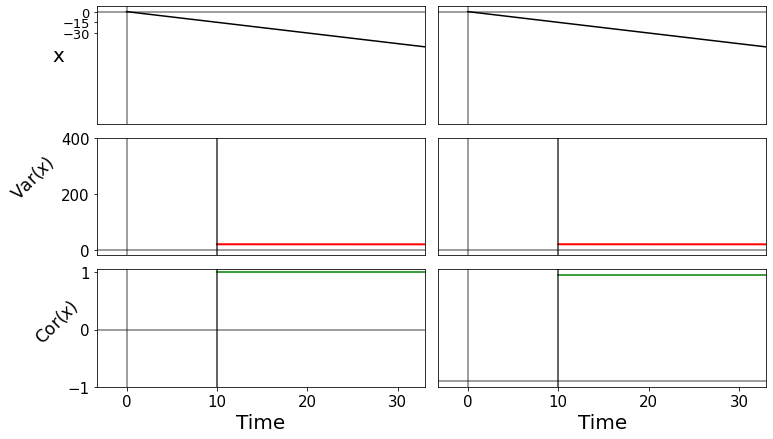

In [24]:
dataset = np.genfromtxt('Datasets/data_rtip.csv', delimiter=',')
var_dat = np.genfromtxt('Datasets/r_var_dat.csv', delimiter=',')
auto_dat = np.genfromtxt('Datasets/r_auto_dat.csv', delimiter=',')

k = 90
l = 0

#d = np.linspace(-7,10,1000)
t = np.linspace(0,100,1000)
t_alt = t[100:]



plt.figure(figsize=(12,7))

plt.subplot(3,2,1)
plt.plot(t, dataset[l,1:], color='k')
plt.ylabel('x', rotation=0, fontsize=20)

plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k') 
plt.xticks([])
plt.yticks(np.arange(0, -45, -15), fontsize=13)
plt.xlim(left=-3.3, right=33)
plt.ylim(bottom=min(dataset[k,1:])*1.05, top=-min(dataset[k,1:])*0.05)



plt.subplot(3,2,2)
plt.plot(t, dataset[k,1:], label='$x(r)$', color='k')


plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k') 
plt.xticks([])
# plt.yticks(np.arange(-3, 3, 1), fontsize=15)
plt.yticks([])
plt.ylim(bottom=min(dataset[k,1:])*1.05, top=-min(dataset[k,1:])*0.05)
plt.xlim(left=-3.3, right=33)


#plt.legend(loc='best', fontsize=15)


plt.subplot(3,2,3)
plt.plot(t_alt, var_dat[l,], 'r', linewidth=2)
plt.ylabel('Var($x$)  \n', rotation=45, fontsize=17)
plt.axvline(x=10, alpha=0.8, color='k')


plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks([])
plt.yticks(np.arange(0, 600, 200), fontsize=15)
# plt.yticks(np.arange(0, 2, 0.5), fontsize=15)
plt.ylim(-20,400)
plt.xlim(left=-3.3, right=33)



plt.subplot(3,2,4)
plt.plot(t_alt, var_dat[k,], 'r', label='Var($x$)', linewidth=2)
plt.axvline(x=10, alpha=0.8, color='k')
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k') 
plt.xticks([]) 
# plt.yticks(np.arange(0, 2, 0.5), fontsize=15)
plt.yticks([])
plt.xlim(left=-3.3, right=33)
plt.ylim(-20,400)

#plt.legend(loc='best', fontsize=15)



plt.subplot(3,2,5)
plt.plot(t_alt, auto_dat[l,], 'g')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Cor($x$)', rotation=45, fontsize=17)
plt.axvline(x=10, alpha=0.8, color='k')

plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(0, 40, 10), fontsize=15) 
plt.yticks(np.arange(-1, 2, 1), fontsize=15)
plt.xlim(left=-3.3, right=33)
# plt.ylim(-1,1)






plt.subplot(3,2,6)
plt.plot(t_alt, auto_dat[k,], 'g', label='Cor($x$)')
plt.xlabel('Time', fontsize=20)
plt.axvline(x=10, alpha=0.8, color='k')

plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(0, 40, 10), fontsize=15) 
# plt.yticks(np.arange(-1, 2, 1), fontsize=15)
plt.yticks([])
plt.xlim(left=-3.3, right=33)
# plt.ylim(-1.1,1.1)

# plt.legend(loc='best', fontsize=15)



plt.subplots_adjust(wspace=0.04, hspace=0.12)

#plt.savefig('data_r_break_down.pdf', dpi=300)

plt.show()

In [26]:
LSTM = keras.models.load_model('Neural Networks\lstm_model_thesis')
CNN = keras.models.load_model('Neural Networks\cnn_model_thesis')

#keras.utils.plot_model(CNN, to_file='CNN_model.pdf', show_shapes=True), keras.utils.plot_model(LSTM, to_file='LSTM_model.pdf', show_shapes=True)

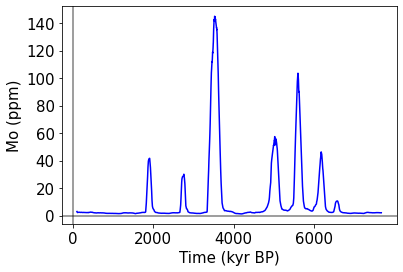

In [28]:
df = pd.read_csv('Datasets\Hennekam-etal_2020/datasets/64PE406-E1_calibratedXRF.tab', sep='\t',skiprows=18)

a = np.asarray(df['Mo [mg/kg]'])
t = np.linspace(0, a.shape[0],a.shape[0]+1)

a = moving_average(a, 100)

plt.plot(t[100:], a, 'b')

plt.ylabel('Mo (ppm)', fontsize=15)
plt.xlabel('Time (kyr BP)', fontsize=15)
plt.axvline(alpha=0.5, color='k')
plt.axhline(alpha=0.5, color='k')
plt.xticks(np.arange(0,a.shape[0],2000), fontsize=15)
plt.yticks(fontsize=15)


#plt.savefig('mo_data.pdf', dpi=300, bbox_inches='tight')

plt.show()